<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/11LR1FModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression based on Fundamental Approach
- Will use `sklearn` classification dataset. It will generate random data.
- The classification is based on the concept of **Week-2** of **Deep Learning** Course by `Andrew Ng`

<img src="images/model_lr.png" style="width:600px;text-align:center">


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
# Generate dataset for Logistic Regression
data_set_x_orig, data_set_y_orig = make_classification(n_samples=10000,n_features=1, n_informative=1, n_redundant=0,n_classes=2,
    n_clusters_per_class=1,)
#print(data_set_x_orig.shape)
#print(data_set_x_orig[:,0])

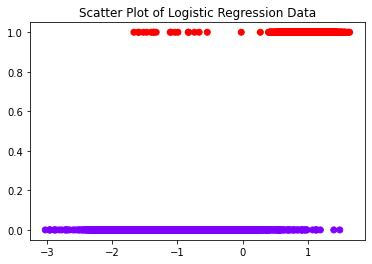

In [18]:
plt.scatter(data_set_x_orig[:,0], data_set_y_orig, c=data_set_y_orig, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression Data')
plt.show()

In [19]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(data_set_x_orig, data_set_y_orig, train_size=0.8, test_size=0.2, random_state=1)

In [20]:
m_train=x_train.shape[0]
x_train=x_train.T
y_train=y_train.reshape(y_train.shape[0],1).T
print(y_train.shape)
m_test=x_test.shape[0]
x_test=x_test.T
y_test=y_test.reshape(y_test.shape[0],1).T


(1, 8000)


In [21]:
print(x_train, x_train.shape)
print(y_train, y_train.shape)

[[-0.81887405 -1.69076738  0.98503102 ... -1.08836659  0.20883473
   1.13295299]] (1, 8000)
[[0 0 1 ... 0 0 1]] (1, 8000)


In [22]:
learning_rate=0.005
max_iteration=40000

w=np.zeros(x_train.shape[0]).reshape(x_train.shape[0],1)
cost=np.zeros((max_iteration))
b=0.0
for i in range(max_iteration):
  z=np.dot(w.T, x_train)
  A=1/(1+np.exp(-z))
  #print(A, A.shape)
  cost[i]=-np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)),axis=1)/m_train
  #print(" Cost", cost)
  dw=np.dot(x_train,(A-y_train).T)/m_train
  db=(np.sum((A-y_train), dtype=np.float64))/m_train
  #print("Gradients dw, b", dw,db)
  w=w-learning_rate*dw
  b=b-learning_rate*db
print(w, b)

[[4.88604745]] -5.766857466406752


In [23]:
#Prediction
A=1/(1+np.exp(-np.dot(w.T, x_train)))
Y_prediction_train=np.zeros((1,x_train.shape[1]))
for i in range(A.shape[1]):
  if A[0,i] > 0.5:
    Y_prediction_train[0,i]=1
  else:
    Y_prediction_train[0,i]=0
print("Training accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train-y_train))*100))
A=1/(1+np.exp(-np.dot(w.T, x_test)))
Y_prediction_test=np.zeros((1,x_test.shape[1]))
for i in range(A.shape[1]):
  if A[0,i] > 0.5:
    Y_prediction_test[0,i]=1
  else:
    Y_prediction_test[0,i]=0
print("Testing accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test-y_test))*100))
# print(y_train)


Training accuracy: 97.6125 %
Testing accuracy: 97.75 %


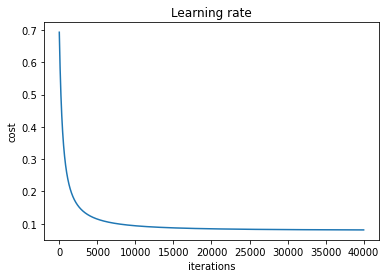

In [24]:
# Plot learning curve (with costs)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()

In [25]:
# Show the Confusion Matrix
#print(y_test, Y_prediction_test)
confusion_matrix(y_test.T, Y_prediction_test.T)

array([[ 942,   41],
       [   4, 1013]])